In [1]:
import pandas as pd

In [2]:
# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [3]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# se utiliza para codificar variables categóricas en variables numéricas
from sklearn.preprocessing import LabelEncoder

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [4]:
#Carga de dataset
data = pd.read_csv('framingham.csv', header=0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
nombres_columnas = {
    'male': 'sexo',
    'age': 'edad',
    'education': 'educacion',
    'currentSmoker': 'fumador_actual',
    'cigsPerDay': 'cigarrillos_por_dia',
    'BPMeds': 'medicamentos_BP',
    'prevalentStroke': 'ACV_prevalente',
    'prevalentHyp': 'HTA_prevalente',
    'diabetes': 'diabetes',
    'totChol': 'colesterol_total',
    'sysBP': 'presion_arterial_sistolica',
    'diaBP': 'presion_arterial_diastolica',
    'BMI': 'IMC',
    'heartRate': 'frecuencia_cardiaca',
    'glucose': 'glucosa',
    'TenYearCHD': 'riesgo_10_anios_CHD'
}

# Cambiar los nombres de las columnas
data = data.rename(columns=nombres_columnas)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sexo                         4238 non-null   int64  
 1   edad                         4238 non-null   int64  
 2   educacion                    4133 non-null   float64
 3   fumador_actual               4238 non-null   int64  
 4   cigarrillos_por_dia          4209 non-null   float64
 5   medicamentos_BP              4185 non-null   float64
 6   ACV_prevalente               4238 non-null   int64  
 7   HTA_prevalente               4238 non-null   int64  
 8   diabetes                     4238 non-null   int64  
 9   colesterol_total             4188 non-null   float64
 10  presion_arterial_sistolica   4238 non-null   float64
 11  presion_arterial_diastolica  4238 non-null   float64
 12  IMC                          4219 non-null   float64
 13  frecuencia_cardiac

In [8]:
# Supongamos que 'data' es tu DataFrame
#
# prevalentStroke (ACV_prevalente): A menos que haya una razón específica para incluir esta columna,Accidente Cerebrovascular

# prevalentHyp (HTA_prevalente): Si no deseas predecir la hipertensión, puedes eliminar esta columna. 


columnas_eliminar = ['HTA_prevalente', 'ACV_prevalente', 'educacion']
# Crea una nueva columna numérica y copia los valores de la columna categórica

# Elimina la columna categórica original
# axis indica que solo se eliminara una columna
# inplace indica que se debe modificar directamente en el data
data.drop(columnas_eliminar, axis=1, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sexo                         4238 non-null   int64  
 1   edad                         4238 non-null   int64  
 2   fumador_actual               4238 non-null   int64  
 3   cigarrillos_por_dia          4209 non-null   float64
 4   medicamentos_BP              4185 non-null   float64
 5   diabetes                     4238 non-null   int64  
 6   colesterol_total             4188 non-null   float64
 7   presion_arterial_sistolica   4238 non-null   float64
 8   presion_arterial_diastolica  4238 non-null   float64
 9   IMC                          4219 non-null   float64
 10  frecuencia_cardiaca          4237 non-null   float64
 11  glucosa                      3850 non-null   float64
 12  riesgo_10_anios_CHD          4238 non-null   int64  
dtypes: float64(8), int

In [10]:
#llenar datos vacios
columnas_especificas = ["medicamentos_BP", "cigarrillos_por_dia", "colesterol_total", "IMC", "glucosa", "frecuencia_cardiaca"]
# se calcula la media de las columnas seleccionadas
media_columnas = data[columnas_especificas].mean()
# fill == llenar
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [11]:
print(media_columnas)

medicamentos_BP          0.029630
cigarrillos_por_dia      9.003089
colesterol_total       236.721585
IMC                     25.802008
glucosa                 81.966753
frecuencia_cardiaca     75.878924
dtype: float64


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sexo                         4238 non-null   int64  
 1   edad                         4238 non-null   int64  
 2   fumador_actual               4238 non-null   int64  
 3   cigarrillos_por_dia          4238 non-null   float64
 4   medicamentos_BP              4238 non-null   float64
 5   diabetes                     4238 non-null   int64  
 6   colesterol_total             4238 non-null   float64
 7   presion_arterial_sistolica   4238 non-null   float64
 8   presion_arterial_diastolica  4238 non-null   float64
 9   IMC                          4238 non-null   float64
 10  frecuencia_cardiaca          4238 non-null   float64
 11  glucosa                      4238 non-null   float64
 12  riesgo_10_anios_CHD          4238 non-null   int64  
dtypes: float64(8), int

In [13]:
longitud = 4238 # RangeIndex
train_long = longitud - longitud * 0.2 # 20%
test_long = longitud - longitud * 0.8 # 80%
print(f'Test longitud {int(np.round(test_long))}, Train longitud {int(train_long)}')

Test longitud 848, Train longitud 3390


In [14]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3390 entries, 3252 to 860
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sexo                         3390 non-null   int64  
 1   edad                         3390 non-null   int64  
 2   fumador_actual               3390 non-null   int64  
 3   cigarrillos_por_dia          3390 non-null   float64
 4   medicamentos_BP              3390 non-null   float64
 5   diabetes                     3390 non-null   int64  
 6   colesterol_total             3390 non-null   float64
 7   presion_arterial_sistolica   3390 non-null   float64
 8   presion_arterial_diastolica  3390 non-null   float64
 9   IMC                          3390 non-null   float64
 10  frecuencia_cardiaca          3390 non-null   float64
 11  glucosa                      3390 non-null   float64
 12  riesgo_10_anios_CHD          3390 non-null   int64  
dtypes: float64(8), int64(

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848 entries, 3188 to 2540
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sexo                         848 non-null    int64  
 1   edad                         848 non-null    int64  
 2   fumador_actual               848 non-null    int64  
 3   cigarrillos_por_dia          848 non-null    float64
 4   medicamentos_BP              848 non-null    float64
 5   diabetes                     848 non-null    int64  
 6   colesterol_total             848 non-null    float64
 7   presion_arterial_sistolica   848 non-null    float64
 8   presion_arterial_diastolica  848 non-null    float64
 9   IMC                          848 non-null    float64
 10  frecuencia_cardiaca          848 non-null    float64
 11  glucosa                      848 non-null    float64
 12  riesgo_10_anios_CHD          848 non-null    int64  
dtypes: float64(8), int64(

In [17]:
train_data.to_csv("train.csv", index=False) # crear los csv

In [18]:
test_data.to_csv("test.csv", index=False) # crear los csv

In [19]:
#Carga de dataset
data = pd.read_csv('train.csv') # entrenamiento

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sexo                         3390 non-null   int64  
 1   edad                         3390 non-null   int64  
 2   fumador_actual               3390 non-null   int64  
 3   cigarrillos_por_dia          3390 non-null   float64
 4   medicamentos_BP              3390 non-null   float64
 5   diabetes                     3390 non-null   int64  
 6   colesterol_total             3390 non-null   float64
 7   presion_arterial_sistolica   3390 non-null   float64
 8   presion_arterial_diastolica  3390 non-null   float64
 9   IMC                          3390 non-null   float64
 10  frecuencia_cardiaca          3390 non-null   float64
 11  glucosa                      3390 non-null   float64
 12  riesgo_10_anios_CHD          3390 non-null   int64  
dtypes: float64(8), int

In [21]:
# Lectura de Datos
# iloc accede a los datos
# x me muestra las primeras 12 columnas
columnas_seleccionadas = list(range(0, 5)) + list(range(6, 13))
X = data.iloc[:, columnas_seleccionadas]
y = data.iloc[:, 5]
m = y.size

In [22]:
print(X)
print('*'*25)
print(y)

      sexo  edad  fumador_actual  cigarrillos_por_dia  medicamentos_BP  \
0        1    40               1                 30.0              0.0   
1        0    57               0                  0.0              0.0   
2        0    47               0                  0.0              0.0   
3        1    41               1                 30.0              0.0   
4        0    64               0                  0.0              0.0   
...    ...   ...             ...                  ...              ...   
3385     0    36               1                  5.0              0.0   
3386     0    57               1                 15.0              0.0   
3387     0    60               0                  0.0              0.0   
3388     1    39               1                 10.0              0.0   
3389     0    35               0                  0.0              0.0   

      colesterol_total  presion_arterial_sistolica  \
0                205.0                       131.0   
1  

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sexo                         3390 non-null   int64  
 1   edad                         3390 non-null   int64  
 2   fumador_actual               3390 non-null   int64  
 3   cigarrillos_por_dia          3390 non-null   float64
 4   medicamentos_BP              3390 non-null   float64
 5   diabetes                     3390 non-null   int64  
 6   colesterol_total             3390 non-null   float64
 7   presion_arterial_sistolica   3390 non-null   float64
 8   presion_arterial_diastolica  3390 non-null   float64
 9   IMC                          3390 non-null   float64
 10  frecuencia_cardiaca          3390 non-null   float64
 11  glucosa                      3390 non-null   float64
 12  riesgo_10_anios_CHD          3390 non-null   int64  
dtypes: float64(8), int

<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como:

$$g(z) = \frac{1}{1+e^{-z}}$$.

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [24]:
# z === 0tx === 00x0 + 01x1
# una probabilidad entre 0 a 1
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # Convierte la entrada a un arreglo numpy
    z = np.array(z)

    # Limita los valores de z para evitar overflow
    z = np.clip(z, -500, 500)

    g = 1 / (1 + np.exp(-z))

    return g

In [25]:
# Prueba la implementacion de la funcion sigmoid
z = 1
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 1 ) =  0.7310585786300049


In [26]:
def  featureNormalize(X):
    # Se crea una copia del conjunto de datos X para evitar modificar los datos originales.
    X_norm = X.copy()
    # se crea un arreglo de 0 para almacenar la media y desviacion estandar
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # media
    mu = np.mean(X, axis = 0)
    # desviacion estandar
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [27]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('*'*20)
print('Media calculada:', mu)
print('*'*20)
print('Desviación estandar calculada:', sigma)
print('*'*20)
print(X_norm)

      sexo  edad  fumador_actual  cigarrillos_por_dia  medicamentos_BP  \
0        1    40               1                 30.0              0.0   
1        0    57               0                  0.0              0.0   
2        0    47               0                  0.0              0.0   
3        1    41               1                 30.0              0.0   
4        0    64               0                  0.0              0.0   
...    ...   ...             ...                  ...              ...   
3385     0    36               1                  5.0              0.0   
3386     0    57               1                 15.0              0.0   
3387     0    60               0                  0.0              0.0   
3388     1    39               1                 10.0              0.0   
3389     0    35               0                  0.0              0.0   

      colesterol_total  presion_arterial_sistolica  \
0                205.0                       131.0   
1  

In [28]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
print(m)
print(n)
# Agrega el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

print(X)        

3390
12
[[ 1.          1.16861732 -1.11033368 ... -0.83779565  0.22124404
  -0.42565792]
 [ 1.         -0.85571212  0.87196279 ... -0.08344309  0.53074029
  -0.42565792]
 [ 1.         -0.85571212 -0.29409396 ...  0.58709253 -0.39774847
  -0.42565792]
 ...
 [ 1.         -0.85571212  1.22177981 ...  0.58709253 -0.04403847
  -0.42565792]
 [ 1.          1.16861732 -1.22693936 ... -0.67016175 -0.88409973
  -0.42565792]
 [ 1.         -0.85571212 -1.69336206 ...  1.17381119 -0.08825222
  -0.42565792]]


In [29]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X.dot(theta.T))

    # epsilon = 1e-10  # Un valor pequeño para evitar divisiones por cero 0.0000000000001
    # J = (1 / m) * np.sum(-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon)))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [30]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [31]:
data = pd.read_csv('test.csv')
print(data)

     sexo  edad  fumador_actual  cigarrillos_por_dia  medicamentos_BP  \
0       1    63               0                  0.0              0.0   
1       1    45               0                  0.0              0.0   
2       0    51               1                  2.0              0.0   
3       1    45               1                 30.0              0.0   
4       0    45               1                  3.0              0.0   
..    ...   ...             ...                  ...              ...   
843     1    47               0                  0.0              0.0   
844     1    44               0                  0.0              0.0   
845     1    50               0                  0.0              0.0   
846     1    64               0                  0.0              0.0   
847     1    55               1                 20.0              0.0   

     diabetes  colesterol_total  presion_arterial_sistolica  \
0           0             190.0                       148.0 

In [52]:
fila_deseada = 846

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].tolist()
  print(fila_completa)
else:
  print("La fila no existe")

# la diabete se predice en el pos 5 del array

[1.0, 64.0, 0.0, 0.0, 0.0, 1.0, 195.0, 176.0, 78.0, 24.9, 95.0, 370.0, 0.0]


theta calculado por el descenso por el gradiente: [-4.40324690e+00  2.60580518e-02  1.97235305e-01 -4.36165950e-02
 -4.30629412e-03  3.71396904e-02  1.96022129e-03  1.50319182e-01
 -7.64975120e-02  1.89278619e-01  4.94608845e-02  1.46901134e+00
 -2.13367240e-02]
0.9992639020909501


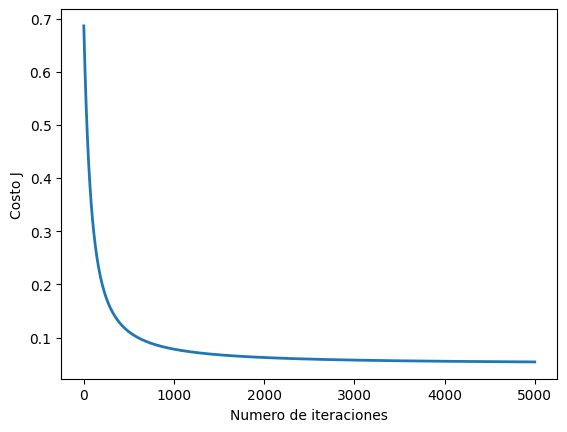

In [53]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.03 #0.001
num_iters = 5000 # 100

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(13)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1, 1.0, 64.0, 0.0, 0.0, 0.0, 195.0, 176.0, 78.0, 24.9, 95.0, 370.0, 0.0]

z = np.dot(X_array, theta) #0*x
probability = sigmoid(z)

print(probability)

# print(f" (usando el descenso por el gradiente):{aprueba}")
#0.9124981079062219

In [34]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
# 
    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    epsilon = 1e-10  # Un valor pequeño para evitar divisiones por cero
    J = (1 / m) * np.sum(-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [35]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)
print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[ 0.47492625 -0.00063854 -0.01491519  0.00674029  0.00511313 -0.00620547
 -0.00383593 -0.01718401 -0.00990483 -0.01621847 -0.00933061 -0.09602128
 -0.01388435]


In [36]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([1, 0.0, 41.0, 4.0, 1.0, 17.0, 261.0, 147.5, 97.0, 31.65, 75.0, 73.0, 0.0])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*grad))


[  1.     0.    41.     4.     1.    17.   261.   147.5   97.    31.65
  75.    73.     0.  ]
Costo en theta prueba: 10.094
Gradiente en theta prueba:
	[0.438, -0.030, 0.170, -0.049, -0.026, 0.073, 0.295, 0.271, 0.258, 0.135, 0.133, -0.018, 0.058]


In [37]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000} # diccionario donde estamos diciendop que haga 1000 iteraciones
# options= {}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True, #Indica que la función de costo también proporciona el gradiente.
                        method='TNC', #  Se utiliza el método de optimización de Newton truncado (TNC).
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print("*"*25)


Costo con un valor de theta encontrado por optimize.minimize: 0.052
theta:
	[-5.232, 0.062, 0.314, -0.075, 0.025, 0.037, 0.009, 0.329, -0.230, 0.272, 0.037, 1.919, -0.127]
*************************


C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_6644\3579219352.py:8: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


In [38]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [39]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([1, 0.0, 41.0, 4.0, 1.0, 17.0, 261.0, 147.5, 97.0, 31.65, 75.0, 73.0, 0.0], theta))
print (prob)
# print('Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: {:.3f}%'.format(prob))
# print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
# print('Precisión esperada (aproximadamente): 92.04 %')

1.0
Precisión de entrenamiento: 98.73 %
